In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras.layers import Dense, Flatten, Dropout
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X Train: {}".format(x_train.shape))
print("------------------------")
print("Y Train: {}".format(x_test.shape))

X Train: (60000, 28, 28)
------------------------
Y Train: (10000, 28, 28)


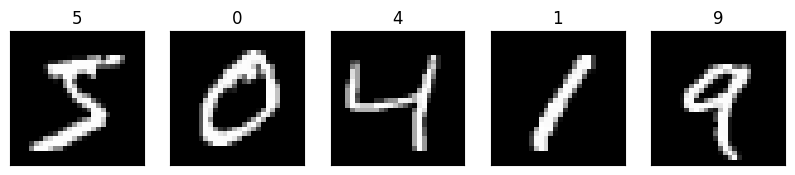

In [ ]:
# Plotting sample images

fig, axes = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu",kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu",kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# traning model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 24s 13ms/step - loss: 0.4449 - accuracy: 0.8756 - val_loss: 0.1925 - val_accuracy: 0.9536
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2404 - accuracy: 0.9403 - val_loss: 0.1791 - val_accuracy: 0.9577
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2006 - accuracy: 0.9539 - val_loss: 0.1464 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1853 - accuracy: 0.9580 - val_loss: 0.1473 - val_accuracy: 0.9693
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1697 - accuracy: 0.9637 - val_loss: 0.1499 - val_accuracy: 0.9702
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1633 - accuracy: 0.9656 - val_loss: 0.1461 - val_accuracy: 0.9712
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1569 - accuracy: 0.9670 - val_loss: 0.1374 - val_accur

In [ ]:
result = model.predict(x_test, verbose=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = result.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9712

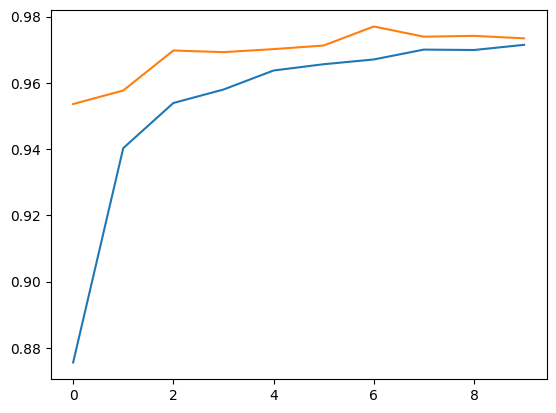

In [ ]:
# Plotting Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

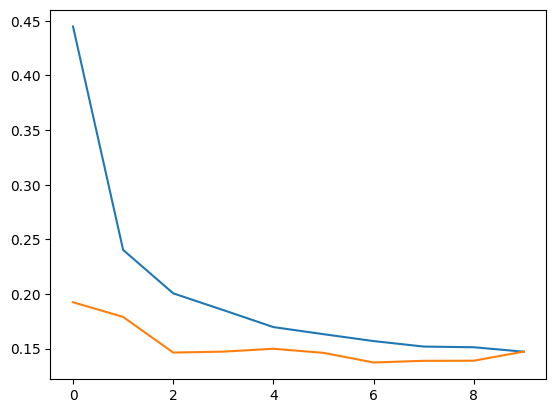

In [ ]:
# Plotting Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
# Dropout Layer Results
# Train Accuracy: 97.19
# Test Accuracy:  97.72